# Basics of implementing quantitative trading strategy

*This notebook will walk you through the steps involved in the process of finalizing a trading strategy for a stock or portfolio. We'll learn the basics of backtesting the strategy we implemented using statistical measures.*

The OLT covers the following topics:

* Getting started guide
    * Data Collection
    * Time series analysis
    * Exploratory data analysis
    * Visualizations
* Financial Analyses
    * Calculating returns
    * Moving averages
    * Volatility calculation
* Implementing Momentum Trading strategy with Python
* Backtesting the strategy
* Evaluating the strategy
    * Sharpe ratio
    * Max Drawdown
    * Compound Annual Growth Rate


# Data reading and cleansing

In this section, we are going to read the data we extracted from the APIs. We'll explore the data and find the caveats with the format of the data. We'll then make the necessary format changes to the data to make it easy to use while implementing the strategy.

In [2]:
# importing the required library for reading the file
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
aapl = pd.read_csv('../data/msft_eod.csv', index_col=0, header=0, parse_dates=True)
aapl.head(10)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2010-01-04,30.62,31.10,30.59,30.950,38409100.0,0.0,1.0,24.356481,24.738294,24.332618,24.618978,38409100.0
2010-01-05,30.85,31.10,30.64,30.960,49749600.0,0.0,1.0,24.539433,24.738294,24.372390,24.626932,49749600.0
2010-01-06,30.88,31.08,30.52,30.770,58182400.0,0.0,1.0,24.563297,24.722385,24.276937,24.475798,58182400.0
2010-01-07,30.63,30.70,30.19,30.452,50559700.0,0.0,1.0,24.364436,24.420117,24.014440,24.222847,50559700.0
2010-01-08,30.28,30.88,30.24,30.660,51197400.0,0.0,1.0,24.086030,24.563297,24.054213,24.388299,51197400.0
2010-01-11,30.71,30.76,30.12,30.270,68754700.0,0.0,1.0,24.428071,24.467843,23.958759,24.078076,68754700.0
2010-01-12,30.15,30.40,29.91,30.070,65912100.0,0.0,1.0,23.982623,24.181484,23.791716,23.918987,65912100.0
2010-01-13,30.26,30.52,30.01,30.350,51863500.0,0.0,1.0,24.070122,24.276937,23.871261,24.141711,51863500.0
2010-01-14,30.31,31.10,30.26,30.960,63228100.0,0.0,1.0,24.109894,24.738294,24.070122,24.626932,63228100.0


In [43]:
# let's looks at the general statistics of the stock.
aapl.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,2245.000000,2245.000000,2245.000000,2245.000000,2.245000e+03,2245.000000,2245.0,2245.000000,2245.000000,2245.000000,2245.000000,2.245000e+03
mean,47.587956,47.988704,47.170634,47.601882,4.156462e+07,0.004566,1.0,43.851657,44.220119,43.467368,43.864295,4.156462e+07
std,23.430901,23.619965,23.205114,23.422961,2.352169e+07,0.037880,0.0,24.585786,24.785837,24.349115,24.578230,2.352169e+07
min,23.090000,23.320000,22.730000,23.010000,7.425603e+06,0.000000,1.0,18.534889,18.719515,18.245908,18.470671,7.425603e+06
25%,28.850000,29.110000,28.540000,28.810000,2.574869e+07,0.000000,1.0,24.044650,24.203353,23.871261,24.030158,2.574869e+07
50%,41.100000,41.565000,40.765000,41.210000,3.601280e+07,0.000000,1.0,37.084914,37.398509,36.753399,37.183473,3.601280e+07
75%,57.540000,57.800000,57.230000,57.590000,5.179460e+07,0.000000,1.0,54.720558,54.977373,54.416185,54.767287,5.179460e+07
max,115.420000,116.180000,114.930000,115.610000,3.193179e+08,0.460000,1.0,114.425180,115.178630,113.939403,114.613542,3.193179e+08


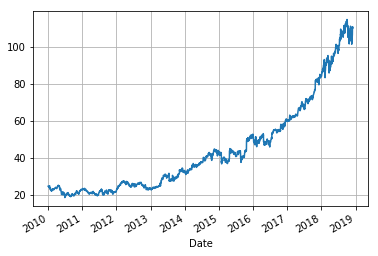

In [44]:
# We should look at the trends and movement of the stock price via some plots
# plotting the closing price using matplotlib which is imported above 
aapl['Adj_Close'].plot(grid=True)

# show the plot
plt.show()

# Financial Analysis: Calculating Returns

## Returns

In [46]:
# we'll be using the adjusted closing price column to calculate the percent change 
daily_close = aapl[['Adj_Close']]

# using pct_change method to calculate the percent change
daily_pct_c = daily_close.pct_change()

# filling the nan values with 0
daily_pct_c.fillna(0, inplace=True)

print(daily_pct_c)

            Adj_Close
Date                 
2010-01-04   0.000000
2010-01-05   0.000323
2010-01-06  -0.006137
2010-01-07  -0.010335
2010-01-08   0.006830
2010-01-11  -0.012720
2010-01-12  -0.006607
2010-01-13   0.009312
2010-01-14   0.020099
2010-01-15  -0.003230
2010-01-19   0.007777
2010-01-20  -0.016559
2010-01-21  -0.018800
2010-01-22  -0.034988
2010-01-25   0.012431
2010-01-26   0.006139
2010-01-27   0.005763
2010-01-28  -0.017189
2010-01-29  -0.033608
2010-02-01   0.008162
2010-02-02   0.001760
2010-02-03   0.005973
2010-02-04  -0.027593
2010-02-05   0.006466
2010-02-08  -0.010707
2010-02-09   0.010462
2010-02-10  -0.000714
2010-02-11   0.004645
2010-02-12  -0.006757
2010-02-16   0.019692
...               ...
2018-10-19   0.001475
2018-10-22   0.008927
2018-10-23  -0.013956
2018-10-24  -0.053469
2018-10-25   0.058444
2018-10-26  -0.012373
2018-10-29  -0.029076
2018-10-30  -0.001156
2018-10-31   0.029692
2018-11-01  -0.008333
2018-11-02   0.002266
2018-11-05   0.012717
2018-11-06

In [47]:
# Resample `aapl` to business months, taking last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()[1:]

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2010-02-26,-0.041806,-0.035762,0.030730,0.017388,-0.791784,NaN,0.0,-0.037412,-0.031340,0.035457,0.022053,-0.791784
2010-03-31,0.034555,0.030156,0.023150,0.021538,0.579367,NaN,0.0,0.034555,0.030156,0.023150,0.021538,0.579367
2010-04-30,0.048246,0.045760,0.046280,0.042595,-0.008551,NaN,0.0,0.048246,0.045760,0.046280,0.042595,-0.008551
2010-05-31,-0.168330,-0.159588,-0.159240,-0.155068,0.067739,NaN,0.0,-0.164549,-0.155768,-0.155418,-0.151227,0.067739
2010-06-30,-0.098297,-0.093415,-0.105612,-0.108140,0.200803,NaN,0.0,-0.098297,-0.093415,-0.105612,-0.108140,0.200803
2010-07-30,0.105150,0.091216,0.104575,0.121686,0.030651,NaN,0.0,0.105150,0.091216,0.104575,0.121686,0.030651
2010-08-31,-0.083495,-0.081656,-0.080079,-0.090856,-0.209017,NaN,0.0,-0.078673,-0.076825,-0.075239,-0.086073,-0.209017
2010-09-30,0.042797,0.046355,0.044597,0.043682,-0.072825,NaN,0.0,0.042797,0.046355,0.044597,0.043682,-0.072825
2010-10-29,0.103210,0.095449,0.087028,0.088812,0.863992,NaN,0.0,0.103210,0.095449,0.087028,0.088812,0.863992


In [18]:
# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,diff
Date,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,-0.038974,-0.039289,-0.034068,-0.034829,-0.120462,inf,0.0,-0.034641,-0.034956,-0.029716,-0.030481,-0.120462,-0.923894
2010-09-30,-0.141517,-0.142118,-0.143024,-0.142461,0.040654,-0.517442,0.0,-0.135896,-0.136505,-0.137404,-0.136843,0.040654,2.416317
2011-01-31,0.070515,0.070366,0.075181,0.074166,-0.084396,0.260073,0.0,0.078307,0.078162,0.083006,0.081987,-0.084396,-2.410798
2011-05-31,-0.030695,-0.032071,-0.032038,-0.033980,0.025224,1.024096,0.0,-0.022756,-0.024143,-0.024112,-0.026068,0.025224,-1.730391
2011-09-30,-0.012453,-0.006692,-0.014467,-0.008958,0.050823,-0.517442,0.0,-0.003580,0.002233,-0.005619,-0.000058,0.050823,-2.404599
2012-01-31,0.040360,0.036418,0.042346,0.039309,-0.137276,0.295181,0.0,0.049295,0.045314,0.051308,0.048235,-0.137276,-0.466918
2012-05-31,0.170642,0.168809,0.172422,0.169505,-0.170928,0.976190,0.0,0.181905,0.180058,0.183689,0.180754,-0.170928,-0.899224
2012-09-30,-0.033191,-0.033607,-0.035117,-0.033830,-0.128090,-0.500000,0.0,-0.024417,-0.024837,-0.026349,-0.025054,-0.128090,-7.007089


## Calculating return using formula

In [19]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj_Close
Date                 
2010-01-04        NaN
2010-01-05   0.000323
2010-01-06  -0.006137
2010-01-07  -0.010335
2010-01-08   0.006830
2010-01-11  -0.012720
2010-01-12  -0.006607
2010-01-13   0.009312
2010-01-14   0.020099
2010-01-15  -0.003230
2010-01-19   0.007777
2010-01-20  -0.016559
2010-01-21  -0.018800
2010-01-22  -0.034988
2010-01-25   0.012431
2010-01-26   0.006139
2010-01-27   0.005763
2010-01-28  -0.017189
2010-01-29  -0.033608
2010-02-01   0.008162
2010-02-02   0.001760
2010-02-03   0.005973
2010-02-04  -0.027593
2010-02-05   0.006466
2010-02-08  -0.010707
2010-02-09   0.010462
2010-02-10  -0.000714
2010-02-11   0.004645
2010-02-12  -0.006757
2010-02-16   0.019692
...               ...
2018-10-19   0.001475
2018-10-22   0.008927
2018-10-23  -0.013956
2018-10-24  -0.053469
2018-10-25   0.058444
2018-10-26  -0.012373
2018-10-29  -0.029076
2018-10-30  -0.001156
2018-10-31   0.029692
2018-11-01  -0.008333
2018-11-02   0.002266
2018-11-05   0.012717
2018-11-06

## Log return

In [32]:
# calculating daily log returns
import numpy as np
daily_log_returns = np.log(daily_close / daily_close.shift(1))

print(daily_log_returns)

            Adj_Close
Date                 
2010-01-04        NaN
2010-01-05   0.000323
2010-01-06  -0.006156
2010-01-07  -0.010389
2010-01-08   0.006807
2010-01-11  -0.012802
2010-01-12  -0.006629
2010-01-13   0.009269
2010-01-14   0.019900
2010-01-15  -0.003235
2010-01-19   0.007747
2010-01-20  -0.016698
2010-01-21  -0.018979
2010-01-22  -0.035615
2010-01-25   0.012354
2010-01-26   0.006120
2010-01-27   0.005746
2010-01-28  -0.017339
2010-01-29  -0.034185
2010-02-01   0.008129
2010-02-02   0.001758
2010-02-03   0.005956
2010-02-04  -0.027981
2010-02-05   0.006445
2010-02-08  -0.010764
2010-02-09   0.010407
2010-02-10  -0.000714
2010-02-11   0.004634
2010-02-12  -0.006780
2010-02-16   0.019501
...               ...
2018-10-19   0.001474
2018-10-22   0.008887
2018-10-23  -0.014054
2018-10-24  -0.054952
2018-10-25   0.056800
2018-10-26  -0.012450
2018-10-29  -0.029507
2018-10-30  -0.001156
2018-10-31   0.029260
2018-11-01  -0.008367
2018-11-02   0.002263
2018-11-05   0.012636
2018-11-06

In [21]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj_Close
Date                 
2010-01-04        NaN
2010-01-05   1.000323
2010-01-06   0.994184
2010-01-07   0.983910
2010-01-08   0.990630
2010-01-11   0.978029
2010-01-12   0.971567
2010-01-13   0.980614
2010-01-14   1.000323
2010-01-15   0.997092
2010-01-19   1.004847
2010-01-20   0.988207
2010-01-21   0.969628
2010-01-22   0.935703
2010-01-25   0.947334
2010-01-26   0.953150
2010-01-27   0.958643
2010-01-28   0.942165
2010-01-29   0.910501
2010-02-01   0.917932
2010-02-02   0.919548
2010-02-03   0.925040
2010-02-04   0.899515
2010-02-05   0.905331
2010-02-08   0.895638
2010-02-09   0.905008
2010-02-10   0.904362
2010-02-11   0.908562
2010-02-12   0.902423
2010-02-16   0.920194
...               ...
2018-10-19   4.375626
2018-10-22   4.414687
2018-10-23   4.353076
2018-10-24   4.120321
2018-10-25   4.361129
2018-10-26   4.307169
2018-10-29   4.181933
2018-10-30   4.177100
2018-10-31   4.301129
2018-11-01   4.265289
2018-11-02   4.274954
2018-11-05   4.329317
2018-11-06

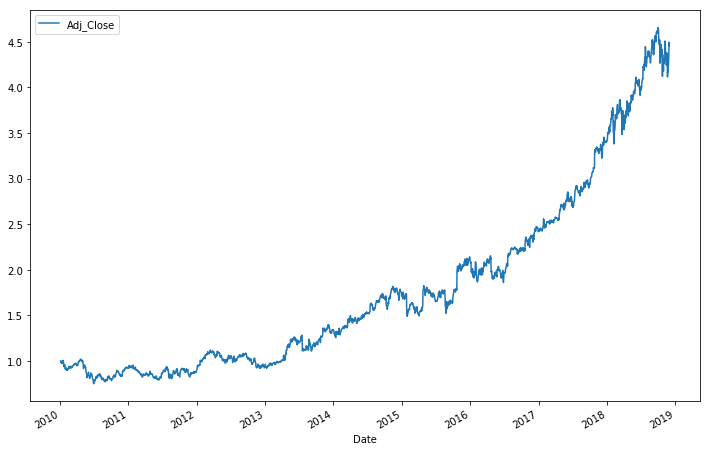

In [33]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()